In [1]:
import pickle

#file = open("./geoid_to_crimecount.pickle", "rb")
#dict = pickle.load(file)
#counts = list(dict.values())
#counts = [x + 0.00001 for x in counts] #Add offset to allow for log transformation later (ensure no values are 0)

In [2]:
import geoid_income_utils

counts = geoid_income_utils.getIncomes()
print(counts[1])
counts.sort()

44107.0


In [3]:
counts.sort()
len(counts)

141

In [4]:
import numpy as np
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter

import pandas as pd
from collections import defaultdict
#import bin_to_folder as b2f

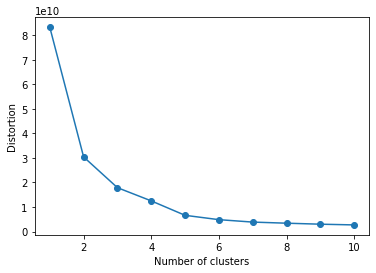

In [5]:
counts_np = np.asarray(counts)
#counts_np = np.log(counts_np)
counts_np = counts_np.reshape((-1, 1))


distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(counts_np)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [6]:
#Perform 2-Means Clustering
km = KMeans(n_clusters = 2, random_state = 0)
km.fit(counts_np)
y = km.predict(counts_np)
cluster_counts = Counter(y)
print(cluster_counts)

curr_count = 0
cutoffs = []
for i in range(2):
    curr_count += cluster_counts[i]
    cutoffs.append(counts[curr_count - 1])
print("2-Means Clustering Cutoffs:")
print(cutoffs)

Counter({1: 94, 0: 47})
2-Means Clustering Cutoffs:
[45477.0, 176103.0]


In [7]:
#Percentiles using 2-Means Clustering
total = sum(cluster_counts.values())
running_sum = cluster_counts[0]
print("Class 0: " + str(cluster_counts[0]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")
running_sum += cluster_counts[1]
print("Class 1: " + str(cluster_counts[1]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")

Class 0: 33.33333333333333% of incomes, 0.3333333333333333 percentile
Class 1: 66.66666666666666% of incomes, 1.0 percentile


In [8]:
#Perform 3-Means Clustering
km = KMeans(n_clusters = 3, random_state = 0)
km.fit(counts_np)
y = km.predict(counts_np)
cluster_counts = Counter(y)
print(cluster_counts)

curr_count = 0
cutoffs = []
for i in range(3):
    curr_count += cluster_counts[i]
    cutoffs.append(counts[curr_count - 1])
print("3-Means Clustering Cutoffs:")
print(cutoffs)

Counter({0: 62, 2: 45, 1: 34})
3-Means Clustering Cutoffs:
[50117.0, 65129.0, 176103.0]


In [9]:
#Percentiles using 3-Means Clustering
total = sum(cluster_counts.values())
running_sum = cluster_counts[0]
print("Class 0: " + str(cluster_counts[0]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")
running_sum += cluster_counts[1]
print("Class 1: " + str(cluster_counts[1]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")
running_sum += cluster_counts[2]
print("Class 2: " + str(cluster_counts[2]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")

Class 0: 43.97163120567376% of incomes, 0.4397163120567376 percentile
Class 1: 24.113475177304963% of incomes, 0.6808510638297872 percentile
Class 2: 31.914893617021278% of incomes, 1.0 percentile


In [10]:
#Perform 4-Means Clustering
km = KMeans(n_clusters = 4, random_state = 0)
km.fit(counts_np)
y = km.predict(counts_np)
cluster_counts = Counter(y)
print(cluster_counts)

curr_count = 0
cutoffs = []
for i in range(4):
    curr_count += cluster_counts[i]
    cutoffs.append(counts[curr_count - 1])
print("4-Means Clustering Cutoffs:")
print(cutoffs)

Counter({3: 60, 1: 45, 0: 33, 2: 3})
4-Means Clustering Cutoffs:
[39375.0, 55625.0, 57250.0, 176103.0]


In [11]:
#Percentiles using 4-Means Clustering
total = sum(cluster_counts.values())
running_sum = cluster_counts[0]
print("Class 0: " + str(cluster_counts[0]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")
running_sum += cluster_counts[1]
print("Class 1: " + str(cluster_counts[1]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")
running_sum += cluster_counts[2]
print("Class 2: " + str(cluster_counts[2]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")
running_sum += cluster_counts[3]
print("Class 3: " + str(cluster_counts[3]/total * 100) + "% of incomes, " + str(running_sum/total) + " percentile")

Class 0: 23.404255319148938% of incomes, 0.23404255319148937 percentile
Class 1: 31.914893617021278% of incomes, 0.5531914893617021 percentile
Class 2: 2.127659574468085% of incomes, 0.574468085106383 percentile
Class 3: 42.5531914893617% of incomes, 1.0 percentile
